In [1]:
#General python imports
%run functions.ipynb
import time
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
import numpy as np

####Importing  Data cleaning,scoring and confusion matrix from functions.ipynb(user created)
#from functions import data_clean
#from functions import training_predict
#from functions import confusion_matrix_plot



import pandas as pd
import matplotlib.pyplot as plt


#### Importing pipeline and preprocessors

from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,StandardScaler,RobustScaler,QuantileTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


####Importing model selection and validation metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score, average_precision_score ,auc,roc_auc_score


#### Importing models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier , StackingClassifier

In [2]:
data_train=pd.read_csv("Customer_Data_DS_Case Study.csv")

In [3]:
region=pd.read_csv('https://raw.githubusercontent.com/cphalpert/census-regions/master/us%20census%20bureau%20regions%20and%20divisions.csv')

In [4]:
region=region[['State Code','Region']]

In [5]:
data_train=data_train.merge(region,left_on='X1',right_on='State Code')
data_train

,Id,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X13,X14,X15,X16,X17,X18,X19,Churn,State Code,Region
0,CUST-1,KS,128,415,No,Yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.70,1,False,KS,Midwest
1,CUST-2,OH,107,415,No,Yes,26,161.6,123,27.47,...,254.4,103,11.45,13.7,3,3.70,1,False,OH,Midwest
2,CUST-3,NJ,137,415,No,No,0,243.4,114,41.38,...,162.6,104,7.32,12.2,5,3.29,0,False,NJ,Northeast
3,CUST-4,OH,84,408,Yes,No,0,299.4,71,50.90,...,196.9,89,8.86,6.6,7,1.78,2,False,OH,Midwest
4,CUST-5,OK,75,415,Yes,No,0,166.7,113,28.34,...,186.9,121,8.41,10.1,3,2.73,3,False,OK,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,CUST-3329,AZ,192,415,No,Yes,36,156.2,77,26.55,...,279.1,83,12.56,9.9,6,2.67,2,False,AZ,West
3329,CUST-3330,WV,68,415,No,No,0,231.1,57,39.29,...,191.3,123,8.61,9.6,4,2.59,3,False,WV,South
3330,CUST-3331,RI,28,510,No,No,0,180.8,109,30.74,...,191.9,91,8.64,14.1,6,3.81,2,False,RI,Northeast
3331,CUST-3332,CT,184,510,Yes,No,0,213.8,105,36.35,...,139.2,137,6.26,5.0,10,1.35,2,False,CT,Northeast


In [8]:
data_train[['X19','Churn']].value_counts()

X19  Churn
1    False    1059
2    False     672
0    False     605
3    False     385
1    True      122
0    True       92
4    False      90
2    True       87
4    True       76
3    True       44
5    True       40
     False      26
6    True       14
     False       8
7    True        5
     False       4
9    True        2
8    False       1
     True        1
Name: count, dtype: int64

In [6]:
import dowhy
from dowhy import CausalModel


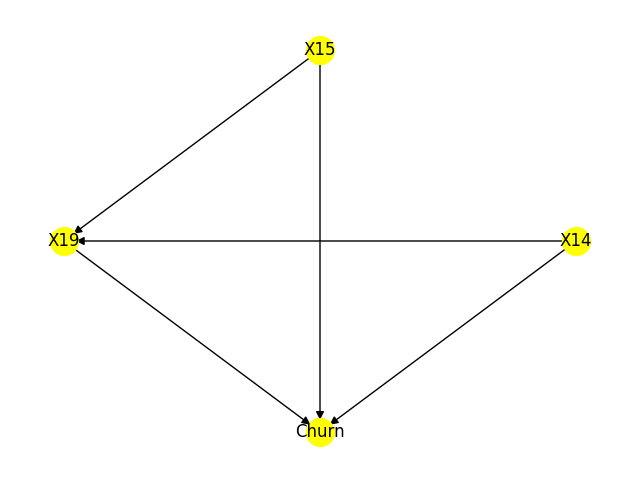

In [8]:
model = CausalModel(
    data=data_train,  # Your dataset
    treatment='X19',  # Name of the treatment variable
    outcome='Churn',  # Name of the outcome variable
    common_causes=['X14', 'X15']  # List of potential confounders
)
model.view_model()


In [9]:
identified_estimand = model.identify_effect()
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                     
──────(E[Churn|X15,X14])
d[X₁₉]                  
Estimand assumption 1, Unconfoundedness: If U→{X19} and U→Churn then P(Churn|X19,X15,X14,U) = P(Churn|X19,X15,X14)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [13]:
estimate = model.estimate_effect(identified_estimand, 
                                 method_name="backdoor.linear_regression",target_units="ate")
# ATE = Average Treatment Effect
# ATT = Average Treatment Effect on Treated (i.e. those who were assigned a different room)
# ATC = Average Treatment Effect on Control (i.e. those who were not assigned a different room)
print(estimate)

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                     
──────(E[Churn|X15,X14])
d[X₁₉]                  
Estimand assumption 1, Unconfoundedness: If U→{X19} and U→Churn then P(Churn|X19,X15,X14,U) = P(Churn|X19,X15,X14)

## Realized estimand
b: Churn~X19+X15+X14
Target units: ate

## Estimate
Mean value: 0.055989667284964156



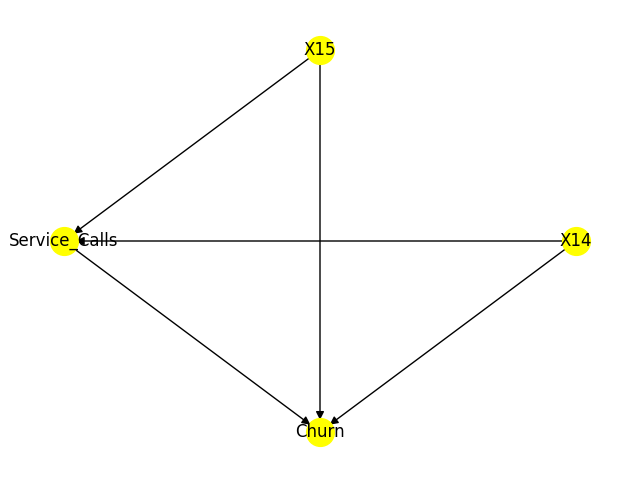

In [157]:
model = CausalModel(
    data=data_train,  # Your dataset
    treatment='Service_Calls',  # Name of the treatment variable
    outcome='Churn',  # Name of the outcome variable
    common_causes=['X14', 'X15']  # List of potential confounders
)
model.view_model()


In [168]:
estimate = model.estimate_effect(identified_estimand, 
                                 method_name="backdoor.propensity_score_weighting",target_units="ate")
# ATE = Average Treatment Effect
# ATT = Average Treatment Effect on Treated (i.e. those who were assigned a different room)
# ATC = Average Treatment Effect on Control (i.e. those who were not assigned a different room)
print(estimate)

propensity_score_weighting
*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                     
──────(E[Churn|X15,X14])
d[X₁₉]                  
Estimand assumption 1, Unconfoundedness: If U→{X19} and U→Churn then P(Churn|X19,X15,X14,U) = P(Churn|X19,X15,X14)

## Realized estimand
b: Churn~X19+X15+X14
Target units: ate

## Estimate
Mean value: 0.40468765662554035



In [169]:
estimate.interpret(method_name="textual_effect_interpreter")

Increasing the treatment variable(s) [Service_Calls] from 0 to 1 causes an increase of 0.40468765662554035 in the expected value of the outcome [Churn], over the data distribution/population represented by the dataset.


In [143]:
k=data_train[['X19','Churn']].pivot_table(index=['X19'],columns=['Churn'],aggfunc="size",fill_value=0).reset_index()
k.columns=['X19', 'False', 'True']
k['%']=(k['True']/(k['True']+k['False']))*100


In [144]:
k

,X19,False,True,%
0,0,605,92,13.199426
1,1,1059,122,10.330229
2,2,672,87,11.462451
3,3,385,44,10.256410
4,4,90,76,45.783133
5,5,26,40,60.606061
6,6,8,14,63.636364
7,7,4,5,55.555556
8,8,1,1,50.000000
9,9,0,2,100.000000


In [154]:
data_train['Service_Calls']=np.where(data_train['X19']>3,1,0)
data_train


,Id,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,Churn,State Code,Region,Service_Calls
0,CUST-1,KS,128,415,No,Yes,25,265.1,110,45.07,...,91,11.01,10.0,3,2.70,1,False,KS,Midwest,0
1,CUST-2,OH,107,415,No,Yes,26,161.6,123,27.47,...,103,11.45,13.7,3,3.70,1,False,OH,Midwest,0
2,CUST-3,NJ,137,415,No,No,0,243.4,114,41.38,...,104,7.32,12.2,5,3.29,0,False,NJ,Northeast,0
3,CUST-4,OH,84,408,Yes,No,0,299.4,71,50.90,...,89,8.86,6.6,7,1.78,2,False,OH,Midwest,0
4,CUST-5,OK,75,415,Yes,No,0,166.7,113,28.34,...,121,8.41,10.1,3,2.73,3,False,OK,South,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,CUST-3329,AZ,192,415,No,Yes,36,156.2,77,26.55,...,83,12.56,9.9,6,2.67,2,False,AZ,West,0
3329,CUST-3330,WV,68,415,No,No,0,231.1,57,39.29,...,123,8.61,9.6,4,2.59,3,False,WV,South,0
3330,CUST-3331,RI,28,510,No,No,0,180.8,109,30.74,...,91,8.64,14.1,6,3.81,2,False,RI,Northeast,0
3331,CUST-3332,CT,184,510,Yes,No,0,213.8,105,36.35,...,137,6.26,5.0,10,1.35,2,False,CT,Northeast,0


,Id,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,Churn,State Code,Region,Service_Calls
10,CUST-11,IN,65,415,No,No,0,129.1,137,21.95,...,111,9.40,12.7,6,3.43,4,True,IN,Midwest,1
14,CUST-15,IA,62,415,No,No,0,120.7,70,20.52,...,99,9.14,13.1,6,3.54,4,False,IA,Midwest,1
15,CUST-16,NY,161,415,No,No,0,332.9,67,56.59,...,128,7.23,5.4,9,1.46,4,True,NY,Northeast,1
21,CUST-22,CO,77,408,No,No,0,62.4,89,10.61,...,64,9.43,5.7,6,1.54,5,True,CO,West,1
48,CUST-49,ID,119,415,No,No,0,159.1,114,27.05,...,91,6.44,8.8,3,2.38,5,True,ID,West,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,CUST-3308,OK,172,408,No,No,0,203.9,109,34.66,...,65,7.23,17.8,4,4.81,4,False,OK,South,1
3309,CUST-3310,VT,100,408,Yes,No,0,219.4,112,37.30,...,95,11.49,12.0,4,3.24,4,False,VT,Northeast,1
3320,CUST-3321,GA,122,510,Yes,No,0,140.0,101,23.80,...,133,5.40,9.7,4,2.62,4,True,GA,South,1
3322,CUST-3323,MD,62,408,No,No,0,321.1,105,54.59,...,72,8.12,11.5,2,3.11,4,True,MD,South,1


In [137]:
k.columns=['X19', 'False', 'True']

In [138]:
k

,X19,False,True
0,0,605,92
1,1,1059,122
2,2,672,87
3,3,385,44
4,4,90,76
5,5,26,40
6,6,8,14
7,7,4,5
8,8,1,1
9,9,0,2


In [48]:
data_train[['X19','Churn']].value_counts()

X19  Churn
1    False    1059
2    False     672
0    False     605
3    False     385
1    True      122
0    True       92
4    False      90
2    True       87
4    True       76
3    True       44
5    True       40
     False      26
6    True       14
     False       8
7    True        5
     False       4
9    True        2
8    False       1
     True        1
Name: count, dtype: int64

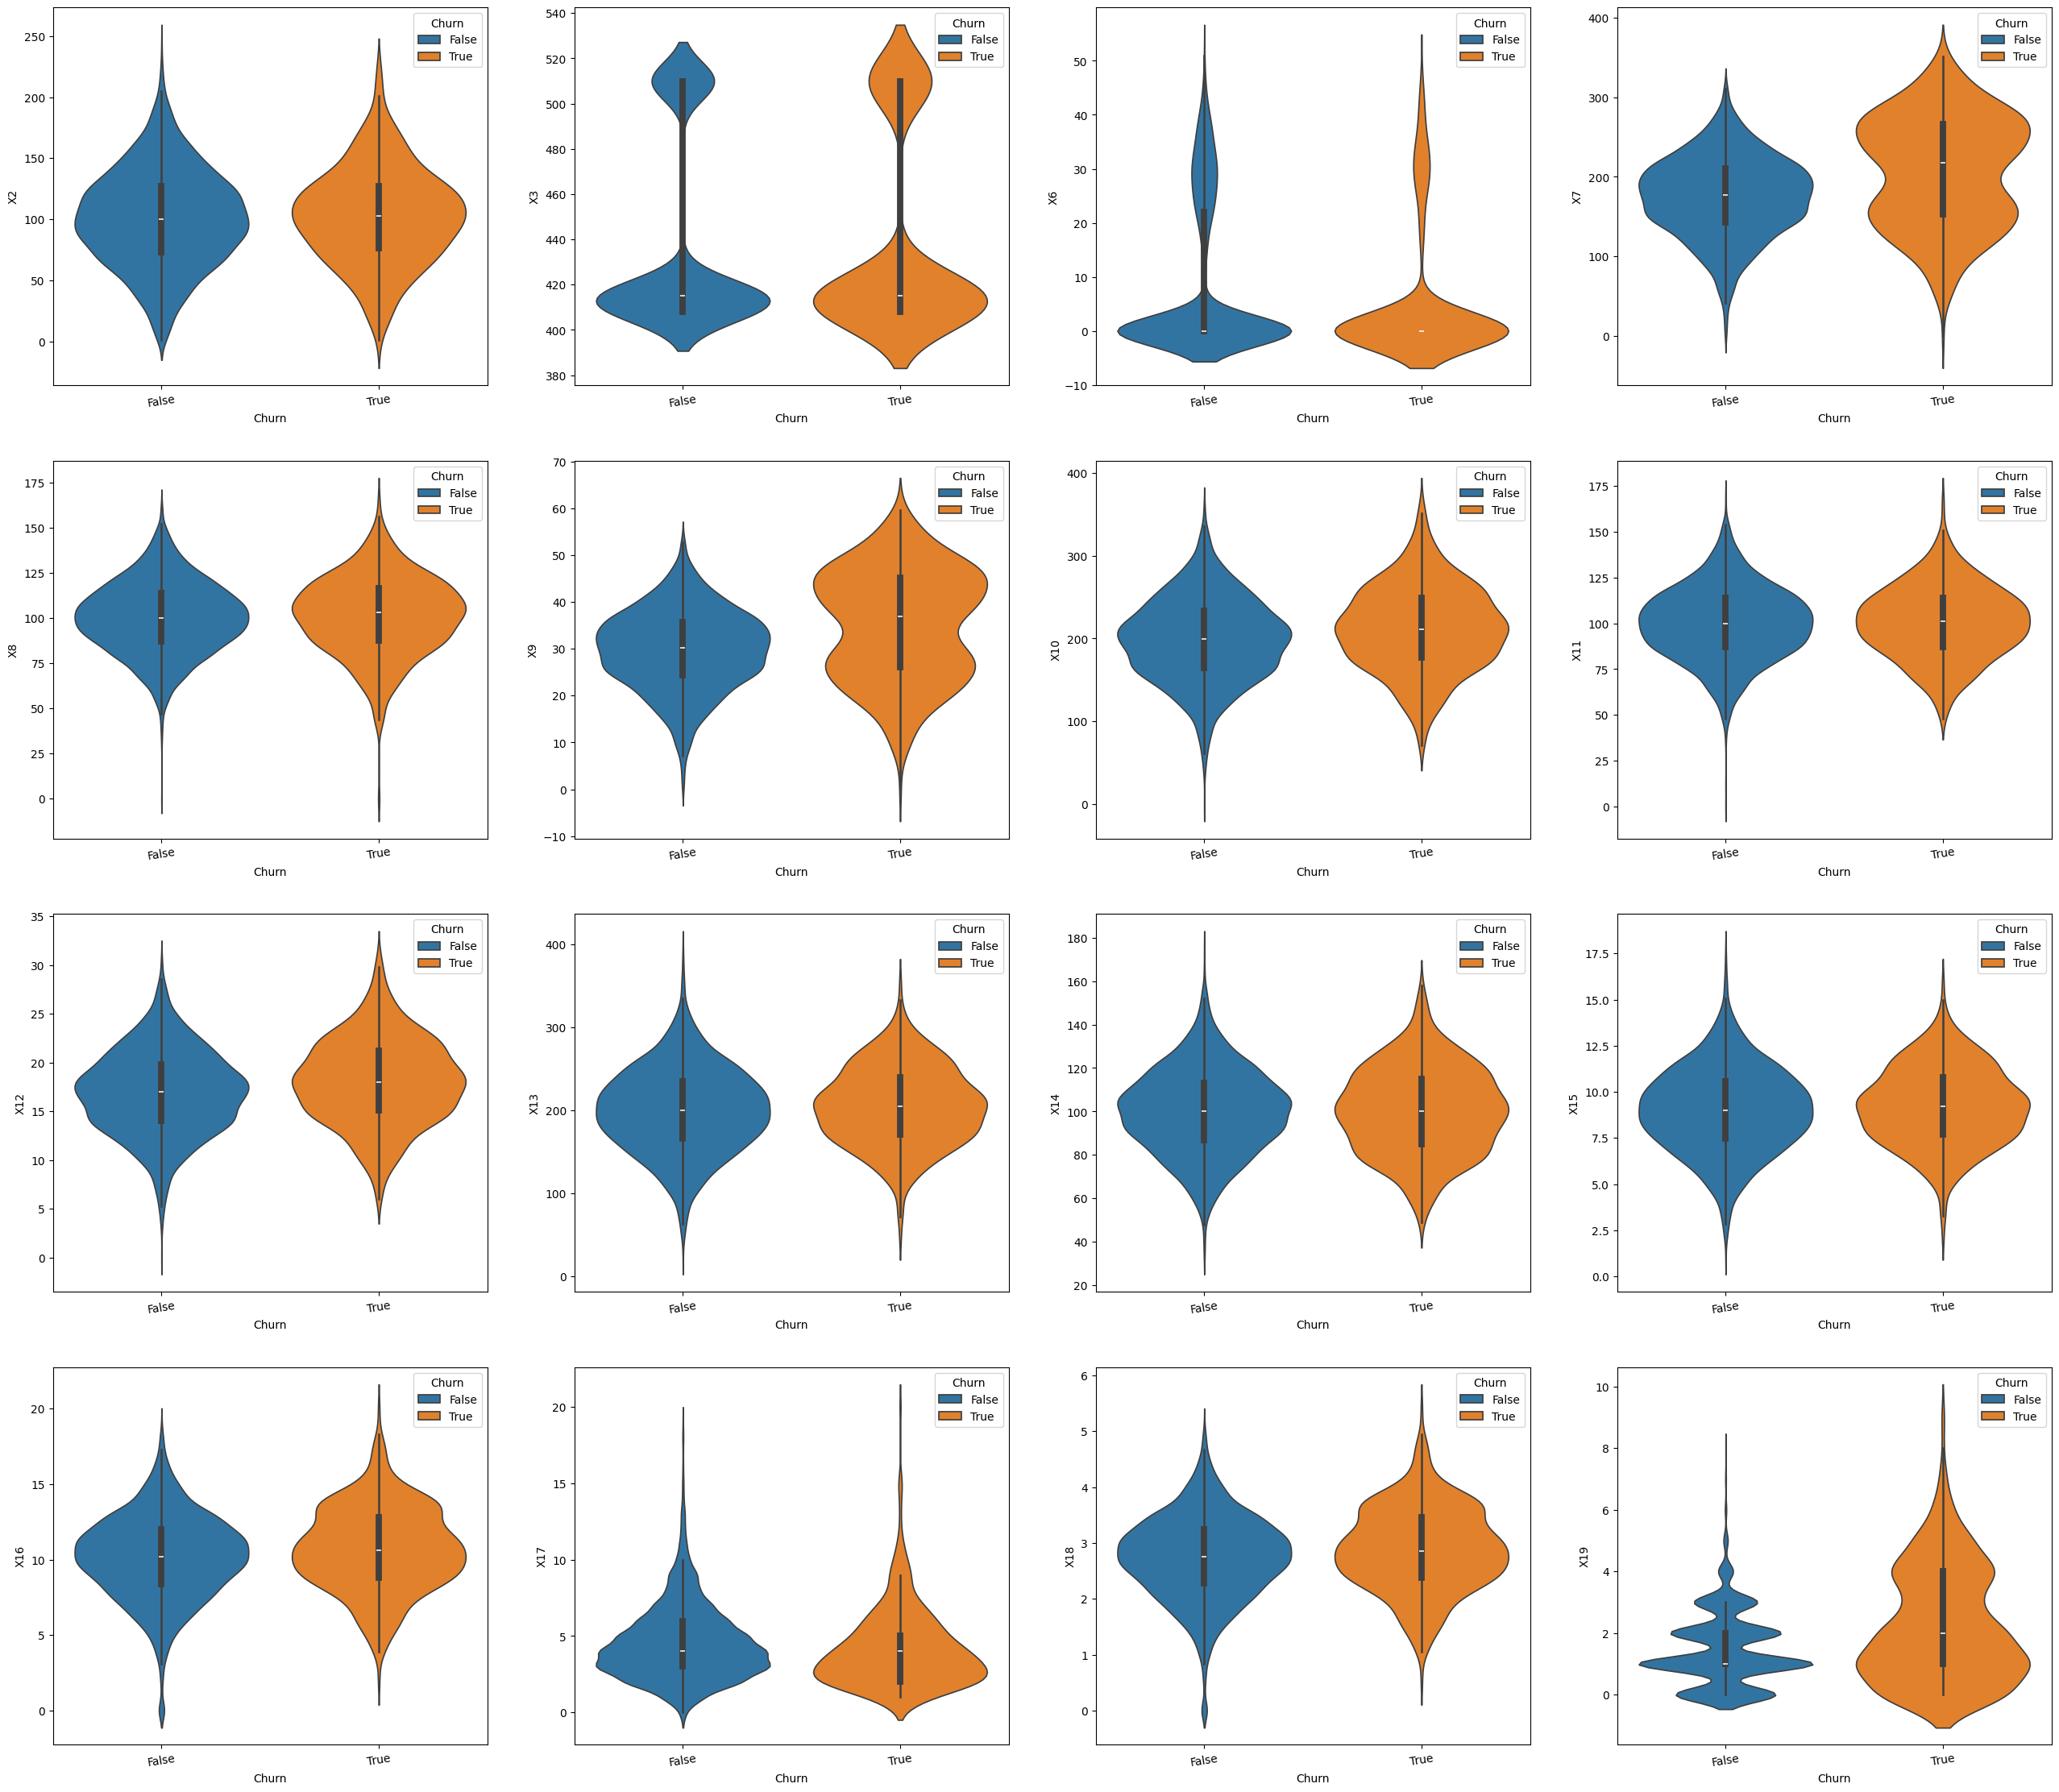

In [7]:
##Numeric features
#numeric_features =  data_train.select_dtypes(include=["float","int"]).columns
import seaborn as sns

#fig, axs = plt.subplots(ncols=int(len(numeric_features)))
cols=data_train.select_dtypes(include=["float","int"]).columns
fig, axes = plt.subplots(len(cols)//4, 4, figsize=(32, 28))
i = 0
#fig.set_size_inches(95, 35)

i = 0
for triaxis in axes:
    for axis in triaxis:

            chart=sns.violinplot(y=cols[i],x='Churn',data=data_train,ax=axis,hue='Churn')
            chart.set_xticklabels(chart.get_xticklabels(), rotation=9)
            
            i = i+1



# for i in numeric_features:

#     sns.scatterplot(data=data_train, x='Churn', y=i,hue='Churn')

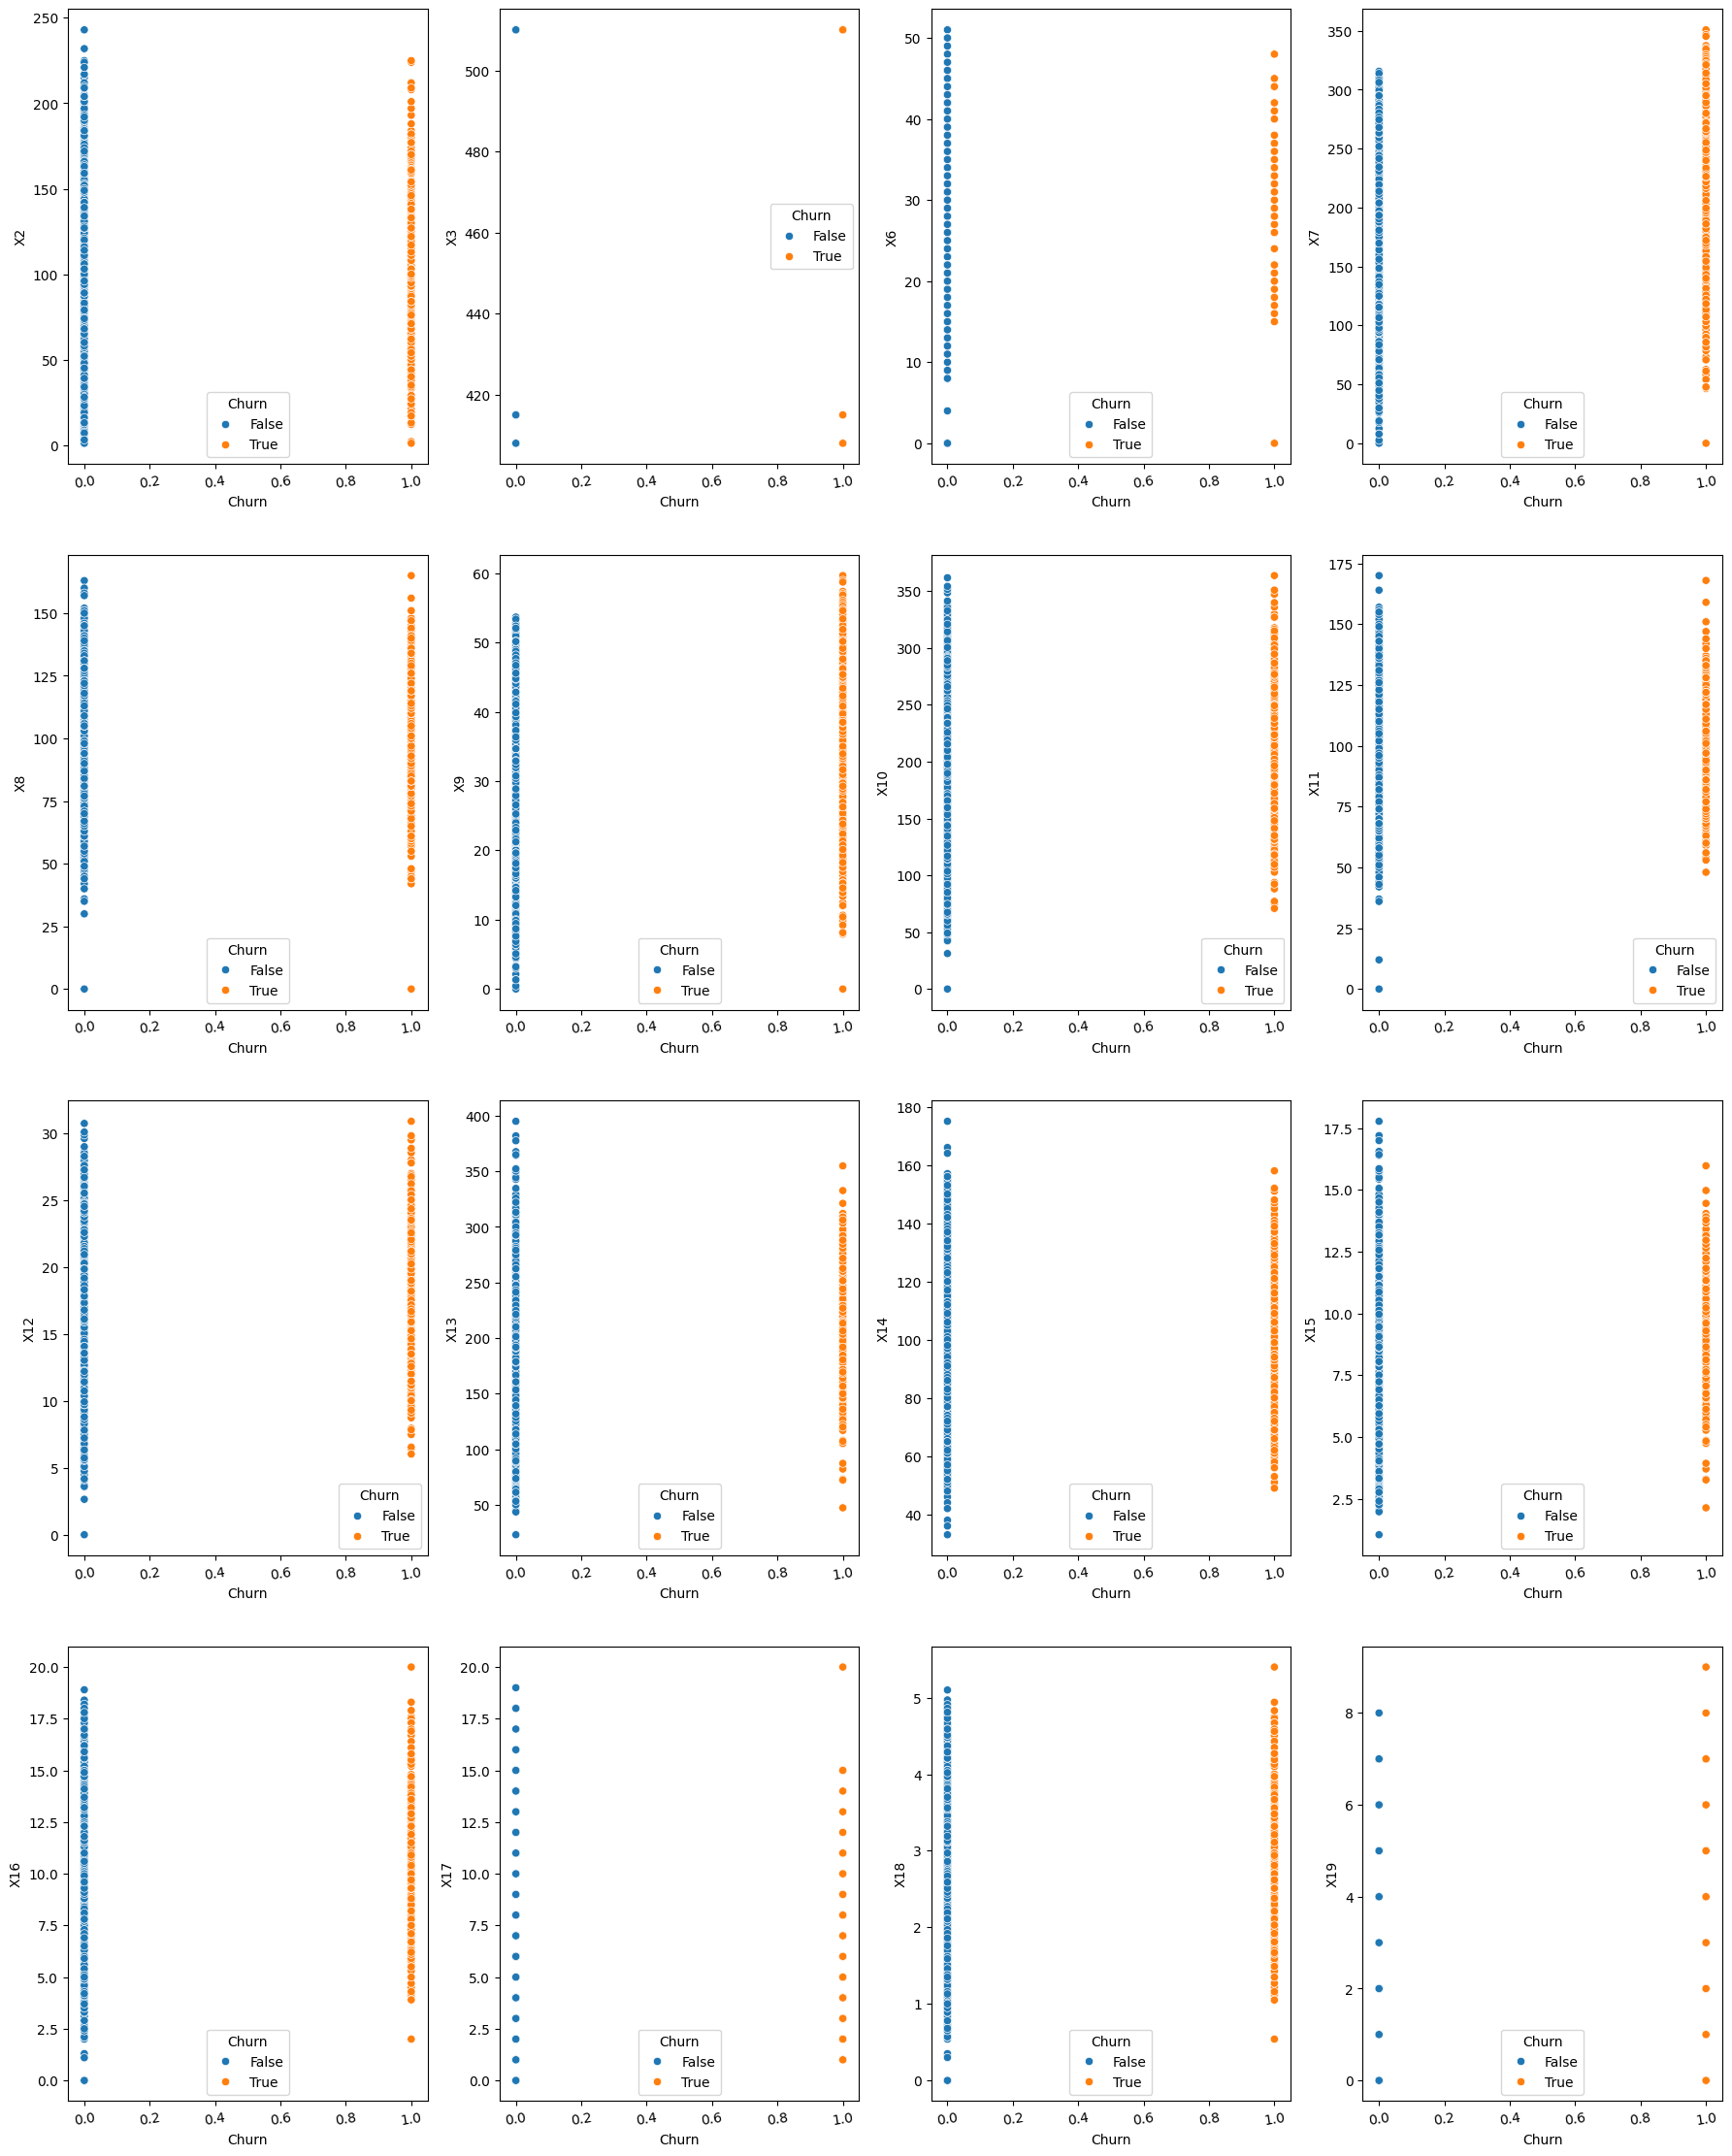

In [60]:
import seaborn as sns

#fig, axs = plt.subplots(ncols=int(len(numeric_features)))
fig, axes = plt.subplots(len(cols)//4, 4, figsize=(22, 28))
i = 0
#fig.set_size_inches(95, 35)
cols=data_train.select_dtypes(include=["float","int"]).columns
i = 0
for triaxis in axes:
    for axis in triaxis:

            chart=sns.scatterplot(y=cols[i],x='Churn',data=data_train,ax=axis,hue='Churn')
            chart.set_xticklabels(chart.get_xticklabels(), rotation=9)
            
            i = i+1



# for i in numeric_features:

#     sns.scatterplot(data=data_train, x='Churn', y=i,hue='Churn')

In [8]:
plt.matshow(data_train.corr())
plt.show()

ValueError: could not convert string to float: 'CUST-1'

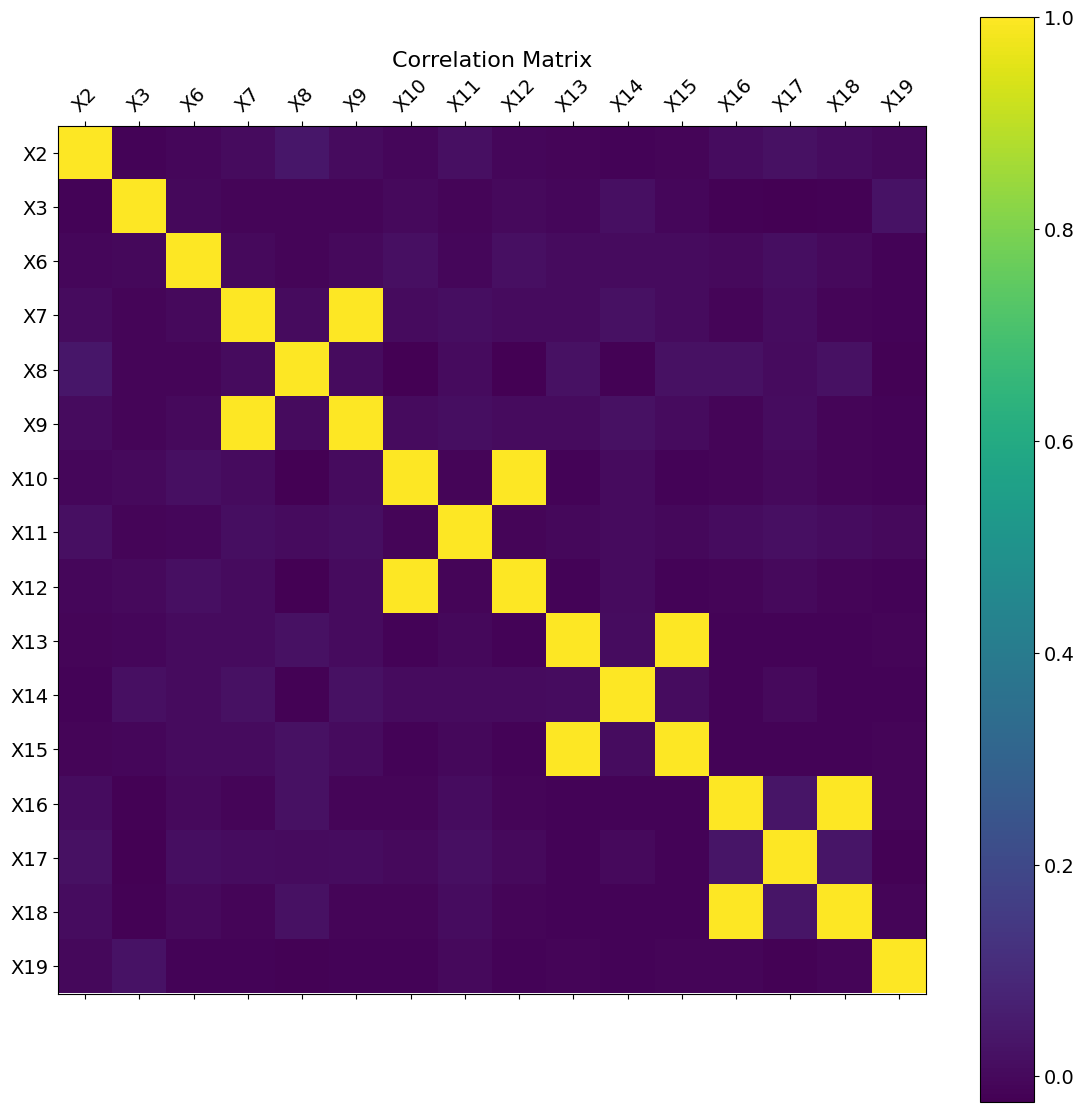

In [214]:
all_data=data_train

##Numeric features
numeric_features =  all_data.select_dtypes(include=["float","int"]).columns

df=data_train[numeric_features]
f = plt.figure(figsize=(14, 14))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);


In [146]:
data_train.shape

(3333, 25)

In [114]:
#data_train['X3']=data_train['X3'].astype(str)

In [156]:
##target variable
labels=data_train["Churn"]
#### Rest of features
all_data=data_train.drop(columns=["Id","Churn",'X9','X12','X15','X18','X1','State Code'])

##Numeric features
numeric_features =  all_data.select_dtypes(include=["float","int"]).columns
### Categorical features
categorical_features=all_data.select_dtypes(exclude=["float","int"]).columns

#### Selecting Median imputer as startegy for imputing missing values and Robust scaler as strategy for 
#### standardizing data.Since the missing values in EDA
####Robust scaler was slightly better at model performance than standard scaler 
####because of its robustness to outliers


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())])

# Selecting simple imputer as startegy for imputing missing values to "missing" category 
#### Onehot encoding  as next step in pipeline for categorical variables


categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])




##### Applying preprocessing steps as column transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)],remainder="passthrough")

In [155]:
categorical_features

Index(['X4', 'X5', 'Region'], dtype='object')

In [154]:
preprocessor.fit_transform(all_data).shape

(3333, 20)

In [157]:
classifiers = [
    (LogisticRegression(random_state=42,class_weight='balanced'),"logistic regression "),
    

    (RandomForestClassifier(random_state=42,class_weight='balanced'),"Random Forest"),
    (AdaBoostClassifier(random_state=42),"Ada-Boost"),
    (GradientBoostingClassifier(random_state=42),"GBM"),
    (XGBClassifier(scale_pos_weight=3.97),"xgboost")
    
]

In [158]:

X_train, X_test, y_train, y_test = train_test_split(all_data, labels, test_size=0.3,random_state=42,stratify=labels,shuffle=True)

### Finding the imbalance in the dataset (instance percentage of minority class amongst all classes)

print ('The Imbalance is: {}'.format(np.unique(y_train, return_counts=True)[1][1] / 
                                    (float(np.unique(y_train, return_counts=True)[1][0]) + 
                                    np.unique(y_train, return_counts=True)[1][1])*100))



####Created startified K fold to ensure same ratio of labels in each fold
cv=StratifiedKFold(n_splits=5, random_state=1,shuffle=True)

##Cross validating each classifier on training dataset by scoring on AUC and reporting several metrics
### Such as AUC,Average Precison Score,F1 Score,Precision ,Recall on test data split to objectively evaluate classifier
for r,v in tqdm(classifiers) :
    
    clf=make_pipeline(preprocessor,r)
    clf.fit(X_train, y_train)
    scores = cross_val_score(clf,X_train, y_train, cv=cv,scoring="roc_auc")
    Y_pred=clf.predict(X_test)
    print("Model AUC:train-cv"+ " " + str(v)+" "+"%0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    print("Test Resuts")
    print("F1: ",f1_score(y_test , Y_pred))
    print("recall: ",recall_score(y_test , Y_pred))
    print("precision: ",precision_score(y_test , Y_pred))
    print("auc: ",roc_auc_score(y_test ,clf.predict_proba(X_test)[:,1])  )
    print("AP-SCORE: ",average_precision_score(y_test ,clf.predict_proba(X_test)[:,1])  )
    

The Imbalance is: 14.487783969138448


  0%|                                                     | 0/5 [00:00<?, ?it/s]

Model AUC:train-cv logistic regression  0.82 (+/- 0.04)
Test Resuts


 20%|█████████                                    | 1/5 [00:00<00:00,  4.44it/s]

F1:  0.4592274678111588
recall:  0.7379310344827587
precision:  0.3333333333333333
auc:  0.81340592861464
AP-SCORE:  0.45677263701023335


 40%|██████████████████                           | 2/5 [00:02<00:03,  1.21s/it]

Model AUC:train-cv Random Forest 0.91 (+/- 0.03)
Test Resuts
F1:  0.7325102880658436
recall:  0.6137931034482759
precision:  0.9081632653061225
auc:  0.8978060092760637
AP-SCORE:  0.8207073205774216


 60%|███████████████████████████                  | 3/5 [00:03<00:02,  1.13s/it]

Model AUC:train-cv Ada-Boost 0.85 (+/- 0.05)
Test Resuts
F1:  0.4666666666666667
recall:  0.38620689655172413
precision:  0.5894736842105263
auc:  0.8389997983464408
AP-SCORE:  0.5550214544997744


 80%|████████████████████████████████████         | 4/5 [00:05<00:01,  1.77s/it]

Model AUC:train-cv GBM 0.92 (+/- 0.03)
Test Resuts
F1:  0.8015267175572519
recall:  0.7241379310344828
precision:  0.8974358974358975
auc:  0.9055172413793103
AP-SCORE:  0.8470910990140462


100%|█████████████████████████████████████████████| 5/5 [00:06<00:00,  1.36s/it]

Model AUC:train-cv xgboost 0.91 (+/- 0.02)
Test Resuts
F1:  0.8129496402877698
recall:  0.7793103448275862
precision:  0.849624060150376
auc:  0.902294817503529
AP-SCORE:  0.848062629633549


Test results for Xgboost Model:
{'auc': 0.9010929622907844, 'AP-SCORE': 0.8503523201560789, 'Recall_test': 0.7379310344827587, 'Precision_test': 0.8991596638655462, 'F1_Score_test': 0.8106060606060606}


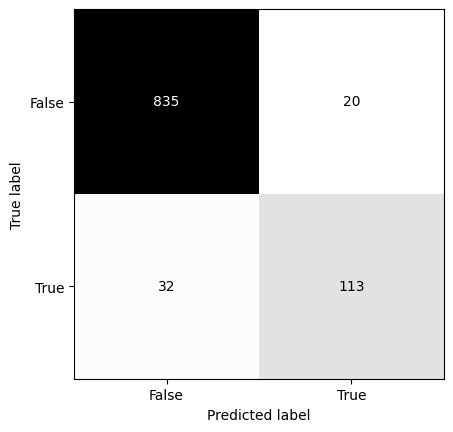

In [159]:
#### From the above results we conclude that xgboost is the best perofrming model with a great balance on all scores
#### Indicating that it predicts both majority and minority class well.This can be further 
#### verfified by confusion matrix below

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


### Confusion matrix of  Xgb baseline model indicates a good predicting performance on both classes
### as well as a high auc score
model_xgb=XGBClassifier()
pipe_sgb=make_pipeline(preprocessor,model_xgb)  
pipe_sgb.fit(X_train,y_train)
print("Test results for Xgboost Model:")
print(training_predict(pipe_sgb,X_train,y_train,X_test,y_test))
y_pred=clf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,colorbar=False,cmap='binary')


Test results for Voting Classifier Model:
{'auc': 0.916483161927808, 'AP-SCORE': 0.8395365972707628, 'Recall_test': 0.7448275862068966, 'Precision_test': 0.84375, 'F1_Score_test': 0.7912087912087912}


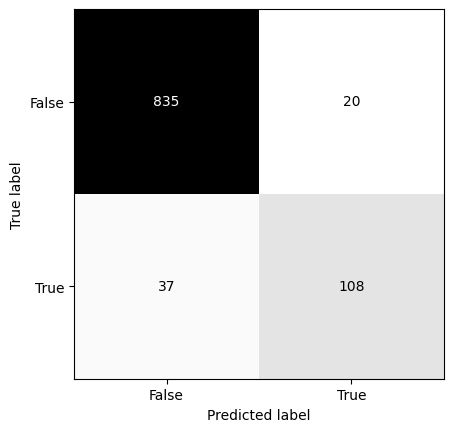

In [160]:
#### After xgboost it was difficult to find a model with a great balanced performance on all scores indicating either
#### it was perdicting majority class very well (Ada-boost,GBM,Random forest) or minority class 
###very well( Logistic regression) but not both (like xgboost)

### Hence we decided to create ensemble models by voting and stacking.
### This was a great idea as Advantage of logistic regression in predicting minority class and ensemble models(gbm,rf) 
## in predicting majority class can be combined to deliver a better classifier then its stand alone performance 







#### Voting Classifier of Logistic regression ,Random Forest and GBM gives higher performance on each of the metrics
### indicating they were covering each other's flaws much better


### Creating estimators for voting classifier
estimators=classifiers = [("logistic regression ",
    LogisticRegression(random_state=42,class_weight='balanced')),
                          
("Random Forest" ,  RandomForestClassifier(random_state=42,class_weight='balanced')),
    ("GBM" ,  GradientBoostingClassifier(random_state=42))]

##Creating Voting classifier model with soft voting so that probabilities c
## an output which is needed for AUC calculation
model_voting=VotingClassifier(estimators=estimators, voting='soft')

## Pipline for voting classifier
pipe_voting = make_pipeline(preprocessor,model_voting)

pipe_voting.fit(X_train,y_train)
print("Test results for Voting Classifier Model:")
print(training_predict(pipe_voting,X_train,y_train,X_test,y_test))

y_pred=pipe_voting.predict(X_test)
## Confusion Matrix for voting classifier
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,colorbar=False,cmap='binary')  

Test results for Stacking Classifier Model:
{'auc': 0.9053357531760436, 'AP-SCORE': 0.850093525058089, 'Recall_test': 0.8344827586206897, 'Precision_test': 0.7423312883435583, 'F1_Score_test': 0.7857142857142857}


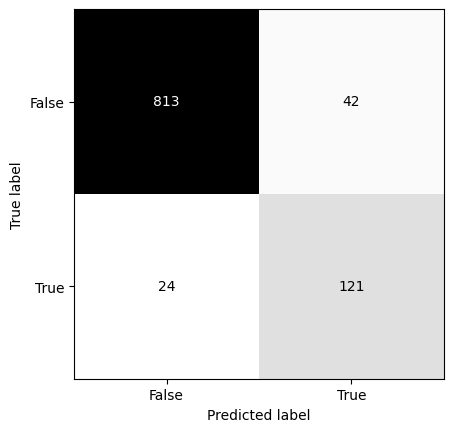

In [161]:
### Stacked ensemble with logistic regression as main estimator and gbm and random forest as seeders performed better
### than voting classifier and is the second best model we obtain




#estimators for stacking classifier
estimator = [
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=42)),
    ("GBM" ,  GradientBoostingClassifier(random_state=42))
    ]




### Defining stacking classifier with final estimator as Logistic Regression and GBM and Random Forest as seeders
model_stack=StackingClassifier(estimators=estimator, final_estimator= LogisticRegression(random_state=42,class_weight='balanced'))

pipe_stack = make_pipeline(preprocessor,model_stack)
pipe_stack.fit(X_train,y_train)
print("Test results for Stacking Classifier Model:")
print(training_predict(pipe_stack,X_train,y_train,X_test,y_test))

y_pred=pipe_stack.predict(X_test)
## Confusion Matrix for voting classifier
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,colorbar=False,cmap='binary')  

In [162]:
### Retaining the parameters of models from baselines
### Scale_pos_weight will be contnuosly updated(1/imbalance-ratio) within the loop to adjust 
### for changes in imbalance ratio

### Search Space for smote ratios of minority class .
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import ADASYN
smote_values=np.linspace(25,60,5)
from datetime import datetime
xgb = XGBClassifier(random_state= 42)
from imblearn.over_sampling import SVMSMOTE

log_reg = LogisticRegression(random_state= 42,class_weight='balanced')

rf = RandomForestClassifier(random_state= 42,class_weight='balanced')

gbm=GradientBoostingClassifier(random_state=42)

##estimators for voting classifier
estimator_vote=classifiers = [("logistic regression ",
    LogisticRegression(random_state=42,class_weight='balanced')),
                          
                          ("Random Forest" ,  RandomForestClassifier(random_state=42,class_weight='balanced')),
    

 ("GBM" ,  GradientBoostingClassifier(random_state=42))]

#voting classifier
voting_clf=VotingClassifier(estimators=estimator_vote, voting='soft')

##estimators for stacking classifer

estimator_stacked = [
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=42)),
    ("GBM" ,  GradientBoostingClassifier(random_state=42))
    ]





#stacking classifier
stacked_clf=StackingClassifier(estimators=estimator_stacked, final_estimator= LogisticRegression(random_state=42,class_weight='balanced'))

#### start Measuring time for loop completion
start = time.time()

panel = {} # Saves key as smoting ratio and dictionary is the result of each classifier
#value=42
for value in smote_values:
    sm = BorderlineSMOTE(sampling_strategy=value/100,kind='borderline-1',random_state=42,k_neighbors=8)
    #sm = SVMSMOTE(sampling_strategy=value/100,random_state=42)
    #sm = SMOTENC(sampling_strategy=value/100,random_state=42, categorical_features=[0,2,3,4])
    #sm = ADASYN(sampling_strategy=value/100,random_state=42)
    
    xgb = XGBClassifier(random_state= 42)
    print ('Loop for smote value {} started at {}'.format(value, datetime.now().strftime("%H:%M:%S")))
   
    predictors = {} # Initializing a dictionary to store training and testing data
 
    for model in [log_reg, rf, gbm,xgb,voting_clf,stacked_clf]:
        model_name = model.__class__.__name__
        predictors[model_name]  = {}
        pipe=make_pipeline(preprocessor,sm,model)
        predictors[model_name] =  training_predict(pipe, X_train, y_train, X_test, y_test) #Scores that is returned from trainer goes to
    
    panel[value] = predictors  # the respective predictor
            
    print ('Loop Ended at {}'.format(datetime.now().strftime("%H:%M:%S")))
    print ('\n')
    
print ('Loop took {} mins'.format((time.time() - start) / 60))

Loop for smote value 25.0 started at 02:34:23
Loop Ended at 02:34:31


Loop for smote value 33.75 started at 02:34:31
Loop Ended at 02:34:39


Loop for smote value 42.5 started at 02:34:39
Loop Ended at 02:34:48


Loop for smote value 51.25 started at 02:34:48
Loop Ended at 02:34:57


Loop for smote value 60.0 started at 02:34:57
Loop Ended at 02:35:08


Loop took 0.7403765519460043 mins


In [161]:
# pipe=make_pipeline(preprocessor,sm)
# pipe.fit_resample(X_train,y_train)
categorical_features

Index(['X1', 'X3', 'X4', 'X5'], dtype='object')

In [163]:
smote_iterated_df = pd.DataFrame()
for key in panel:
    temp_df = pd.DataFrame(panel[key]).T
    temp_df['Smote'] = key
    temp_df.index.name = 'Class'
    temp_df.reset_index(inplace= True)
    temp_df.set_index(['Smote','Class'], inplace= True)
    smote_iterated_df = pd.concat([smote_iterated_df,temp_df])
smote_iterated_df

auc  AP-SCORE  Recall_test  \
Smote Class                                                         
25.00 LogisticRegression          0.816165  0.467003     0.744828   
      RandomForestClassifier      0.905106  0.812224     0.627586   
      GradientBoostingClassifier  0.900940  0.843895     0.758621   
      XGBClassifier               0.902174  0.842359     0.737931   
      VotingClassifier            0.915685  0.827560     0.765517   
      StackingClassifier          0.905828  0.845151     0.827586   
33.75 LogisticRegression          0.819722  0.469884     0.737931   
      RandomForestClassifier      0.902912  0.809883     0.668966   
      GradientBoostingClassifier  0.906659  0.839010     0.765517   
      XGBClassifier               0.908740  0.846578     0.772414   
      VotingClassifier            0.915991  0.822407     0.786207   
      StackingClassifier          0.906062  0.839564     0.834483   
42.50 LogisticRegression          0.818939  0.473911     0.737931   
      RandomForestClassifier      0.894019  0.778045     0.668966   
      GradientBoostingClassifier  0.906546  0.847187     0.786207   
      XGBClassifier               0.907925  0.832946     0.772414   
      VotingClassifier            0.913636  0.815529     0.793103   
      StackingClassifier          0.899730  0.823371     0.813793   
51.25 LogisticRegression          0.820520  0.471849     0.744828   
      RandomForestClassifier      0.899121  0.778866     0.689655   
      GradientBoostingClassifier  0.909216  0.839775     0.786207   
      XGBClassifier               0.898762  0.838974     0.765517   
      VotingClassifier            0.913918  0.808801     0.786207   
      StackingClassifier          0.903303  0.821427     0.800000   
60.00 LogisticRegression          0.821351  0.471541     0.737931   
      RandomForestClassifier      0.902424  0.784536     0.710345   
      GradientBoostingClassifier  0.905344  0.825734     0.765517   
      XGBClassifier               0.901190  0.821583     0.786207   
      VotingClassifier            0.911974  0.795966     0.779310   
      StackingClassifier          0.904489  0.808166     0.813793   

                                  Precision_test  F1_Score_test  
Smote Class                                                      
25.00 LogisticRegression                0.345048       0.471616  
      RandomForestClassifier            0.900990       0.739837  
      GradientBoostingClassifier        0.846154       0.800000  
      XGBClassifier                     0.891667       0.807547  
      VotingClassifier                  0.760274       0.762887  
      StackingClassifier                0.727273       0.774194  
33.75 LogisticRegression                0.350820       0.475556  
      RandomForestClassifier            0.850877       0.749035  
      GradientBoostingClassifier        0.834586       0.798561  
      XGBClassifier                     0.861538       0.814545  
      VotingClassifier                  0.745098       0.765101  
      StackingClassifier                0.728916       0.778135  
42.50 LogisticRegression                0.348534       0.473451  
      RandomForestClassifier            0.815126       0.734848  
      GradientBoostingClassifier        0.802817       0.794425  
      XGBClassifier                     0.835821       0.802867  
      VotingClassifier                  0.709877       0.749186  
      StackingClassifier                0.737500       0.773770  
51.25 LogisticRegression                0.351792       0.477876  
      RandomForestClassifier            0.800000       0.740741  
      GradientBoostingClassifier        0.791667       0.788927  
      XGBClassifier                     0.867188       0.813187  
      VotingClassifier                  0.690909       0.735484  
      StackingClassifier                0.720497       0.758170  
60.00 LogisticRegression                0.350820       0.475556  
      RandomForestClassifier            0.792308

In [59]:
clf

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['X2', 'X6', 'X7', 'X8', 'X10', 'X11', 'X13', 'X14', 'X16', 'X17',
       'X19'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strat...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [164]:
#### Tuning for xgboost was done at smote ratio of 0.32 and on few obvious chosen hyperparameters of xgboost such as
### n_estimators,max depth, min_child_weight and regularization lambda.The xgboost model in its base form had a 
### great performance and by model tuning I was able to only get a marginal imporovement in auc performance
### from 0.9838 to 0.9845.This final model was pickled and result2 predictions were taken from this model.



from sklearn.model_selection import RandomizedSearchCV


start_time=time.time()

#### Create X and Y training data here.....
value=60
sm = BorderlineSMOTE(sampling_strategy=value/100,kind='borderline-1',random_state=42,k_neighbors=8)
#sm = ADASYN(sampling_strategy=value/100,random_state=42)
#sm = SMOTENC(sampling_strategy=value/100,random_state=42, categorical_features=[0,2,3,4])
# grid search
XGB = XGBClassifier(random_state=42)
cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)

pipe=Pipeline([('preprocessor', preprocessor),("SMOTE",sm), ('XGB', XGB)])


param_grid = {'XGB__n_estimators':[100,200,300],
    'XGB__max_depth': range(5),
              'XGB__min_child_weight':[1,2,3,4,5], 
              'XGB__reg_lambda': [0.50,0.75,1,1.25,1.5]}


grid_search = RandomizedSearchCV(pipe, param_grid, scoring="recall", cv=cv,verbose=2)
grid_result = grid_search.fit(X_train,y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_[ 'mean_test_score' ]
stds = grid_result.cv_results_[ 'std_test_score' ]
params = grid_result.cv_results_[ 'params' ]

print(time.time()-start_time)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END XGB__max_depth=2, XGB__min_child_weight=3, XGB__n_estimators=200, XGB__reg_lambda=0.5; total time=   0.2s
[CV] END XGB__max_depth=2, XGB__min_child_weight=3, XGB__n_estimators=200, XGB__reg_lambda=0.5; total time=   0.2s
[CV] END XGB__max_depth=2, XGB__min_child_weight=3, XGB__n_estimators=200, XGB__reg_lambda=0.5; total time=   0.2s
[CV] END XGB__max_depth=2, XGB__min_child_weight=3, XGB__n_estimators=200, XGB__reg_lambda=0.5; total time=   0.2s
[CV] END XGB__max_depth=2, XGB__min_child_weight=3, XGB__n_estimators=200, XGB__reg_lambda=0.5; total time=   0.2s
[CV] END XGB__max_depth=4, XGB__min_child_weight=4, XGB__n_estimators=200, XGB__reg_lambda=1.25; total time=   0.2s
[CV] END XGB__max_depth=4, XGB__min_child_weight=4, XGB__n_estimators=200, XGB__reg_lambda=1.25; total time=   0.3s
[CV] END XGB__max_depth=4, XGB__min_child_weight=4, XGB__n_estimators=200, XGB__reg_lambda=1.25; total time=   0.3s
[CV] END XGB__ma

In [218]:
import pickle
#pickle.dump(grid_result.best_estimator_,open("best_model.sav","wb"))
#pickle.dump(grid_result.best_estimator_,open("best_model.pkl","wb"))
#xgboost_best1=pickle.load(open("best_model.pkl", 'rb')) 

In [35]:
grid_result.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['X2', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15',
       'X16', 'X17', 'X18', 'X19'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_val...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=0, max_leaves=None, min_child_weight=2,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=300,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=42, ...))])

In [31]:
grid_result.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['X2', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15',
       'X16', 'X17', 'X18', 'X19'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_val...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=4, max_leaves=None, min_child_weight=3,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=200,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=42, ...))])

test results for final xgboost model :
{'auc': 0.9055212744504941, 'AP-SCORE': 0.8383980212769157, 'Recall_test': 0.8275862068965517, 'Precision_test': 0.7142857142857143, 'F1_Score_test': 0.7667731629392971}


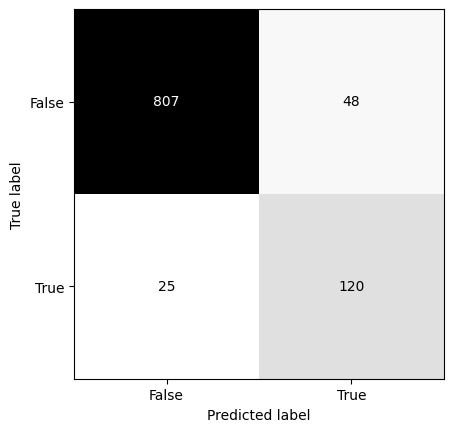

In [165]:
#xgboost_best1=pickle.load(open("best_model.pkl", 'rb'))
value=25
sm = BorderlineSMOTE(sampling_strategy=value/100,kind='borderline-1',random_state=42)
pipe=Pipeline([('preprocessor', preprocessor),("SMOTE",sm), ('XGB', stacked_clf)])

model_xgb1=pipe
model_xgb1.fit(X_train,y_train)
print("test results for final xgboost model :")
print(training_predict(model_xgb1,X_train,y_train,X_test,y_test))
y_pred=model_xgb1.predict(X_test)
## Confusion Matrix for voting classifier
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,colorbar=False,cmap='binary')  

test results for final xgboost model :
{'auc': 0.9034724742891712, 'AP-SCORE': 0.8330743954900715, 'Recall_test': 0.7931034482758621, 'Precision_test': 0.8273381294964028, 'F1_Score_test': 0.8098591549295775}


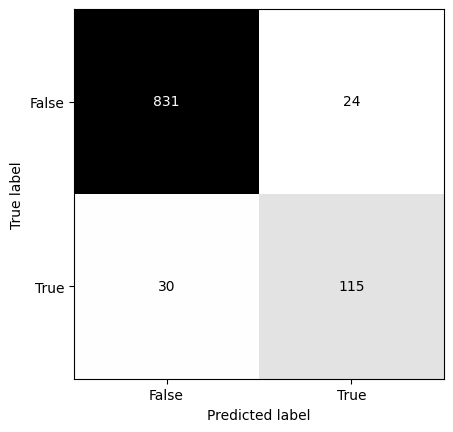

In [173]:
#xgboost_best1=pickle.load(open("best_model.pkl", 'rb'))
value=60
sm = BorderlineSMOTE(sampling_strategy=value/100,kind='borderline-1',random_state=42,k_neighbors=8)
model_xgb1=grid_result.best_estimator_
model_xgb1.fit(X_train,y_train)
print("test results for final xgboost model :")
print(training_predict(model_xgb1,X_train,y_train,X_test,y_test))
y_pred=model_xgb1.predict(X_test)
## Confusion Matrix for voting classifier
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,colorbar=False,cmap='binary')  

In [167]:
import shap

explainer = shap.Explainer(model_xgb1)
shap_values = explainer(X_train)

clust = shap.utils.hclust(X_train, y_train, linkage="single")
shap.plots.bar(shap_values, clustering=clust, clustering_cutoff=1)

TypeError: The passed model is not callable and cannot be analyzed directly with the given masker! Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['X2', 'X3', 'X6', 'X7', 'X8', 'X10', 'X11', 'X13', 'X14', 'X16', 'X17',
       'X19'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strat...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=0, max_leaves=None, min_child_weight=1,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=300,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=42, ...))])

In [170]:
model_xgb1=XGBClassifier(**grid_result.best_params_)
model_xgb1.fit(X_train,y_train)

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:X4: object, X5: object, Region: object

In [174]:
explainer = shap.Explainer(model_xgb1)
shap_values = explainer(X_train)

clust = shap.utils.hclust(X_train, y_train, linkage="single")
shap.plots.bar(shap_values, clustering=clust, clustering_cutoff=1)

TypeError: The passed model is not callable and cannot be analyzed directly with the given masker! Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['X2', 'X3', 'X6', 'X7', 'X8', 'X10', 'X11', 'X13', 'X14', 'X16', 'X17',
       'X19'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strat...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=0, max_leaves=None, min_child_weight=1,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=300,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=42, ...))])

In [81]:
X, y = shap.datasets.adult()

In [175]:
pipe=model_xgb1

In [176]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)],remainder="passthrough")

In [177]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['X2', 'X3', 'X6', 'X7', 'X8', 'X10', 'X11', 'X13', 'X14', 'X16', 'X17',
       'X19'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strat...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=0, max_leaves=None, min_child_weight=1,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=300,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=42, ...))])

In [54]:
model_xgb1['preprocessor'].transformers_[1][1]\
    ['onehot'].get_feature_names(categorical_features)

AttributeError: 'OneHotEncoder' object has no attribute 'get_feature_names'

In [56]:
pipe.named_steps['preprocessor'].transformers_[1][1]\
   .named_steps['onehot'].get_feature_names(categorical_features)

AttributeError: 'OneHotEncoder' object has no attribute 'get_feature_names'

In [57]:
pipe.named_steps['preprocessor'].transformers_[1][1]\
   .named_steps['onehot'].get_feature_names(categorical_features)

AttributeError: 'OneHotEncoder' object has no attribute 'get_feature_names'

In [64]:
pipe.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot']

OneHotEncoder(handle_unknown='ignore')

In [67]:
pipe[:-1].get_feature_names_out()

array(['num__X2', 'num__X6', 'num__X7', 'num__X8', 'num__X10', 'num__X11',
       'num__X13', 'num__X14', 'num__X16', 'num__X17', 'num__X19',
       'cat__X1_AK', 'cat__X1_AL', 'cat__X1_AR', 'cat__X1_AZ',
       'cat__X1_CA', 'cat__X1_CO', 'cat__X1_CT', 'cat__X1_DC',
       'cat__X1_DE', 'cat__X1_FL', 'cat__X1_GA', 'cat__X1_HI',
       'cat__X1_IA', 'cat__X1_ID', 'cat__X1_IL', 'cat__X1_IN',
       'cat__X1_KS', 'cat__X1_KY', 'cat__X1_LA', 'cat__X1_MA',
       'cat__X1_MD', 'cat__X1_ME', 'cat__X1_MI', 'cat__X1_MN',
       'cat__X1_MO', 'cat__X1_MS', 'cat__X1_MT', 'cat__X1_NC',
       'cat__X1_ND', 'cat__X1_NE', 'cat__X1_NH', 'cat__X1_NJ',
       'cat__X1_NM', 'cat__X1_NV', 'cat__X1_NY', 'cat__X1_OH',
       'cat__X1_OK', 'cat__X1_OR', 'cat__X1_PA', 'cat__X1_RI',
       'cat__X1_SC', 'cat__X1_SD', 'cat__X1_TN', 'cat__X1_TX',
       'cat__X1_UT', 'cat__X1_VA', 'cat__X1_VT', 'cat__X1_WA',
       'cat__X1_WI', 'cat__X1_WV', 'cat__X1_WY', 'cat__X3_408',
       'cat__X3_415', 'cat__X3_510', '

In [178]:
pipe=Pipeline([('preprocessor', preprocessor),("SMOTE",sm), ('XGB', XGBClassifier(**grid_result.best_params_))])

In [179]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['X4', 'X5', 'Region'], dtype='object'))])),
                ('SMOTE',
                 BorderlineSMOTE(k_neighbors=8, random_state=42,
                                 sampling_strategy...
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None, ...))])

In [180]:
explainer = shap.Explainer(pipe['XGB'], feature_names=pipe[:-1].get_feature_names_out())

In [202]:
pipe[:-1].get_feature_names_out()

array(['cat__X4_No', 'cat__X4_Yes', 'cat__X5_No', 'cat__X5_Yes',
       'cat__Region_Midwest', 'cat__Region_Northeast',
       'cat__Region_South', 'cat__Region_West', 'remainder__X2',
       'remainder__X3', 'remainder__X6', 'remainder__X7', 'remainder__X8',
       'remainder__X10', 'remainder__X11', 'remainder__X13',
       'remainder__X14', 'remainder__X16', 'remainder__X17',
       'remainder__X19'], dtype=object)

In [181]:
data_transformation = pipe['preprocessor'].transform(X_test)

In [182]:
shap_values = explainer(data_transformation)

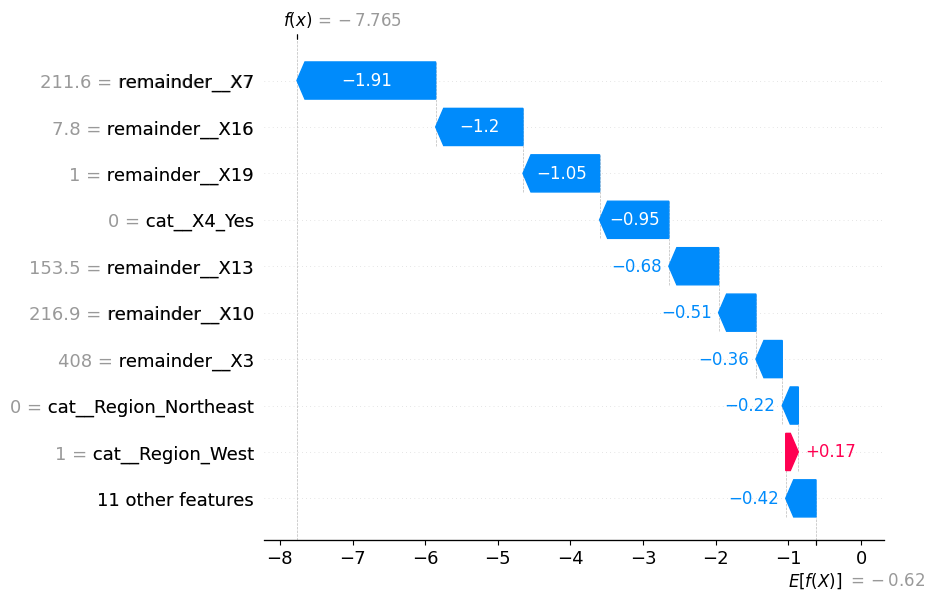

In [183]:
shap.plots.waterfall(shap_values[0])

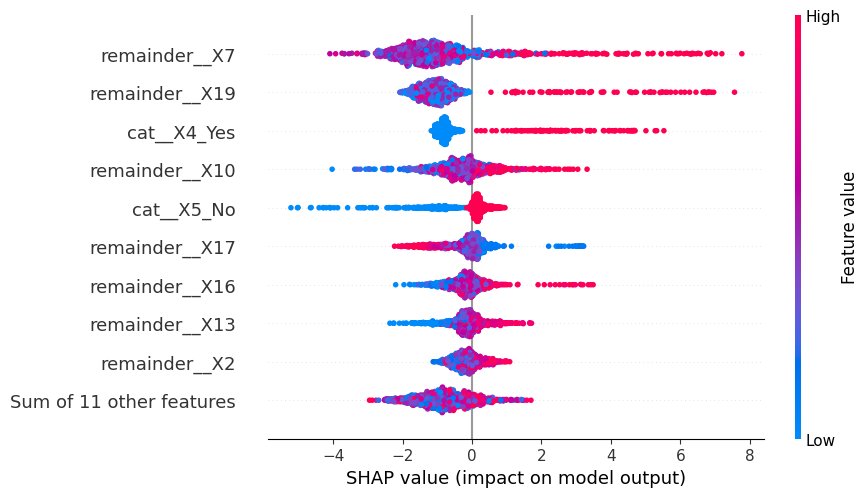

In [201]:
shap.plots.beeswarm(shap_values)

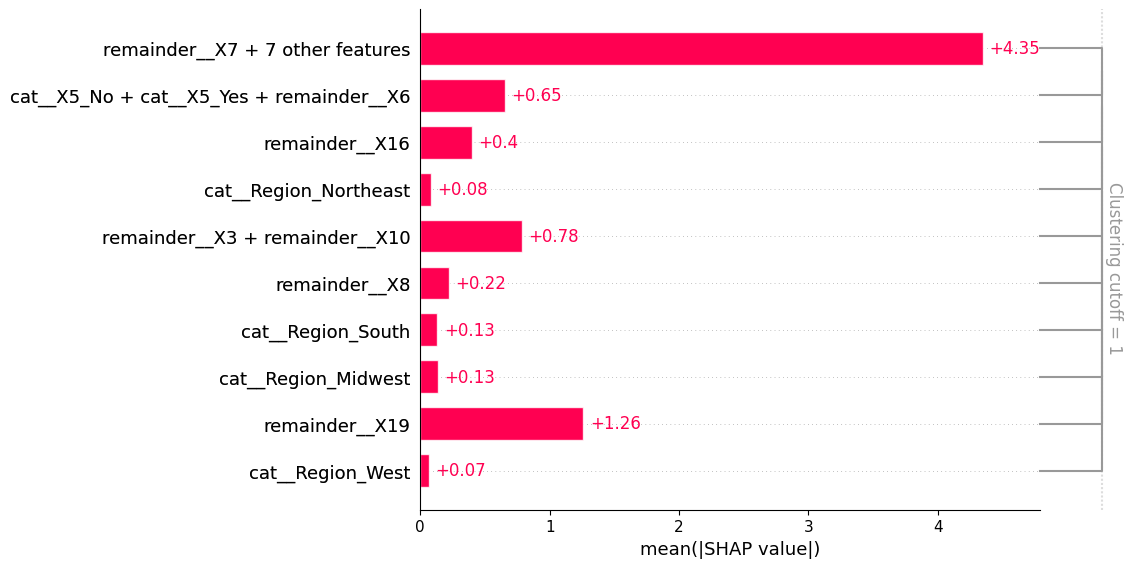

In [199]:



clust = shap.utils.hclust(pipe['preprocessor'].transform(X_test), y_test, linkage="single")
shap.plots.bar(shap_values, clustering=clust, clustering_cutoff=1)

plt.show()

<Figure size 640x480 with 0 Axes>

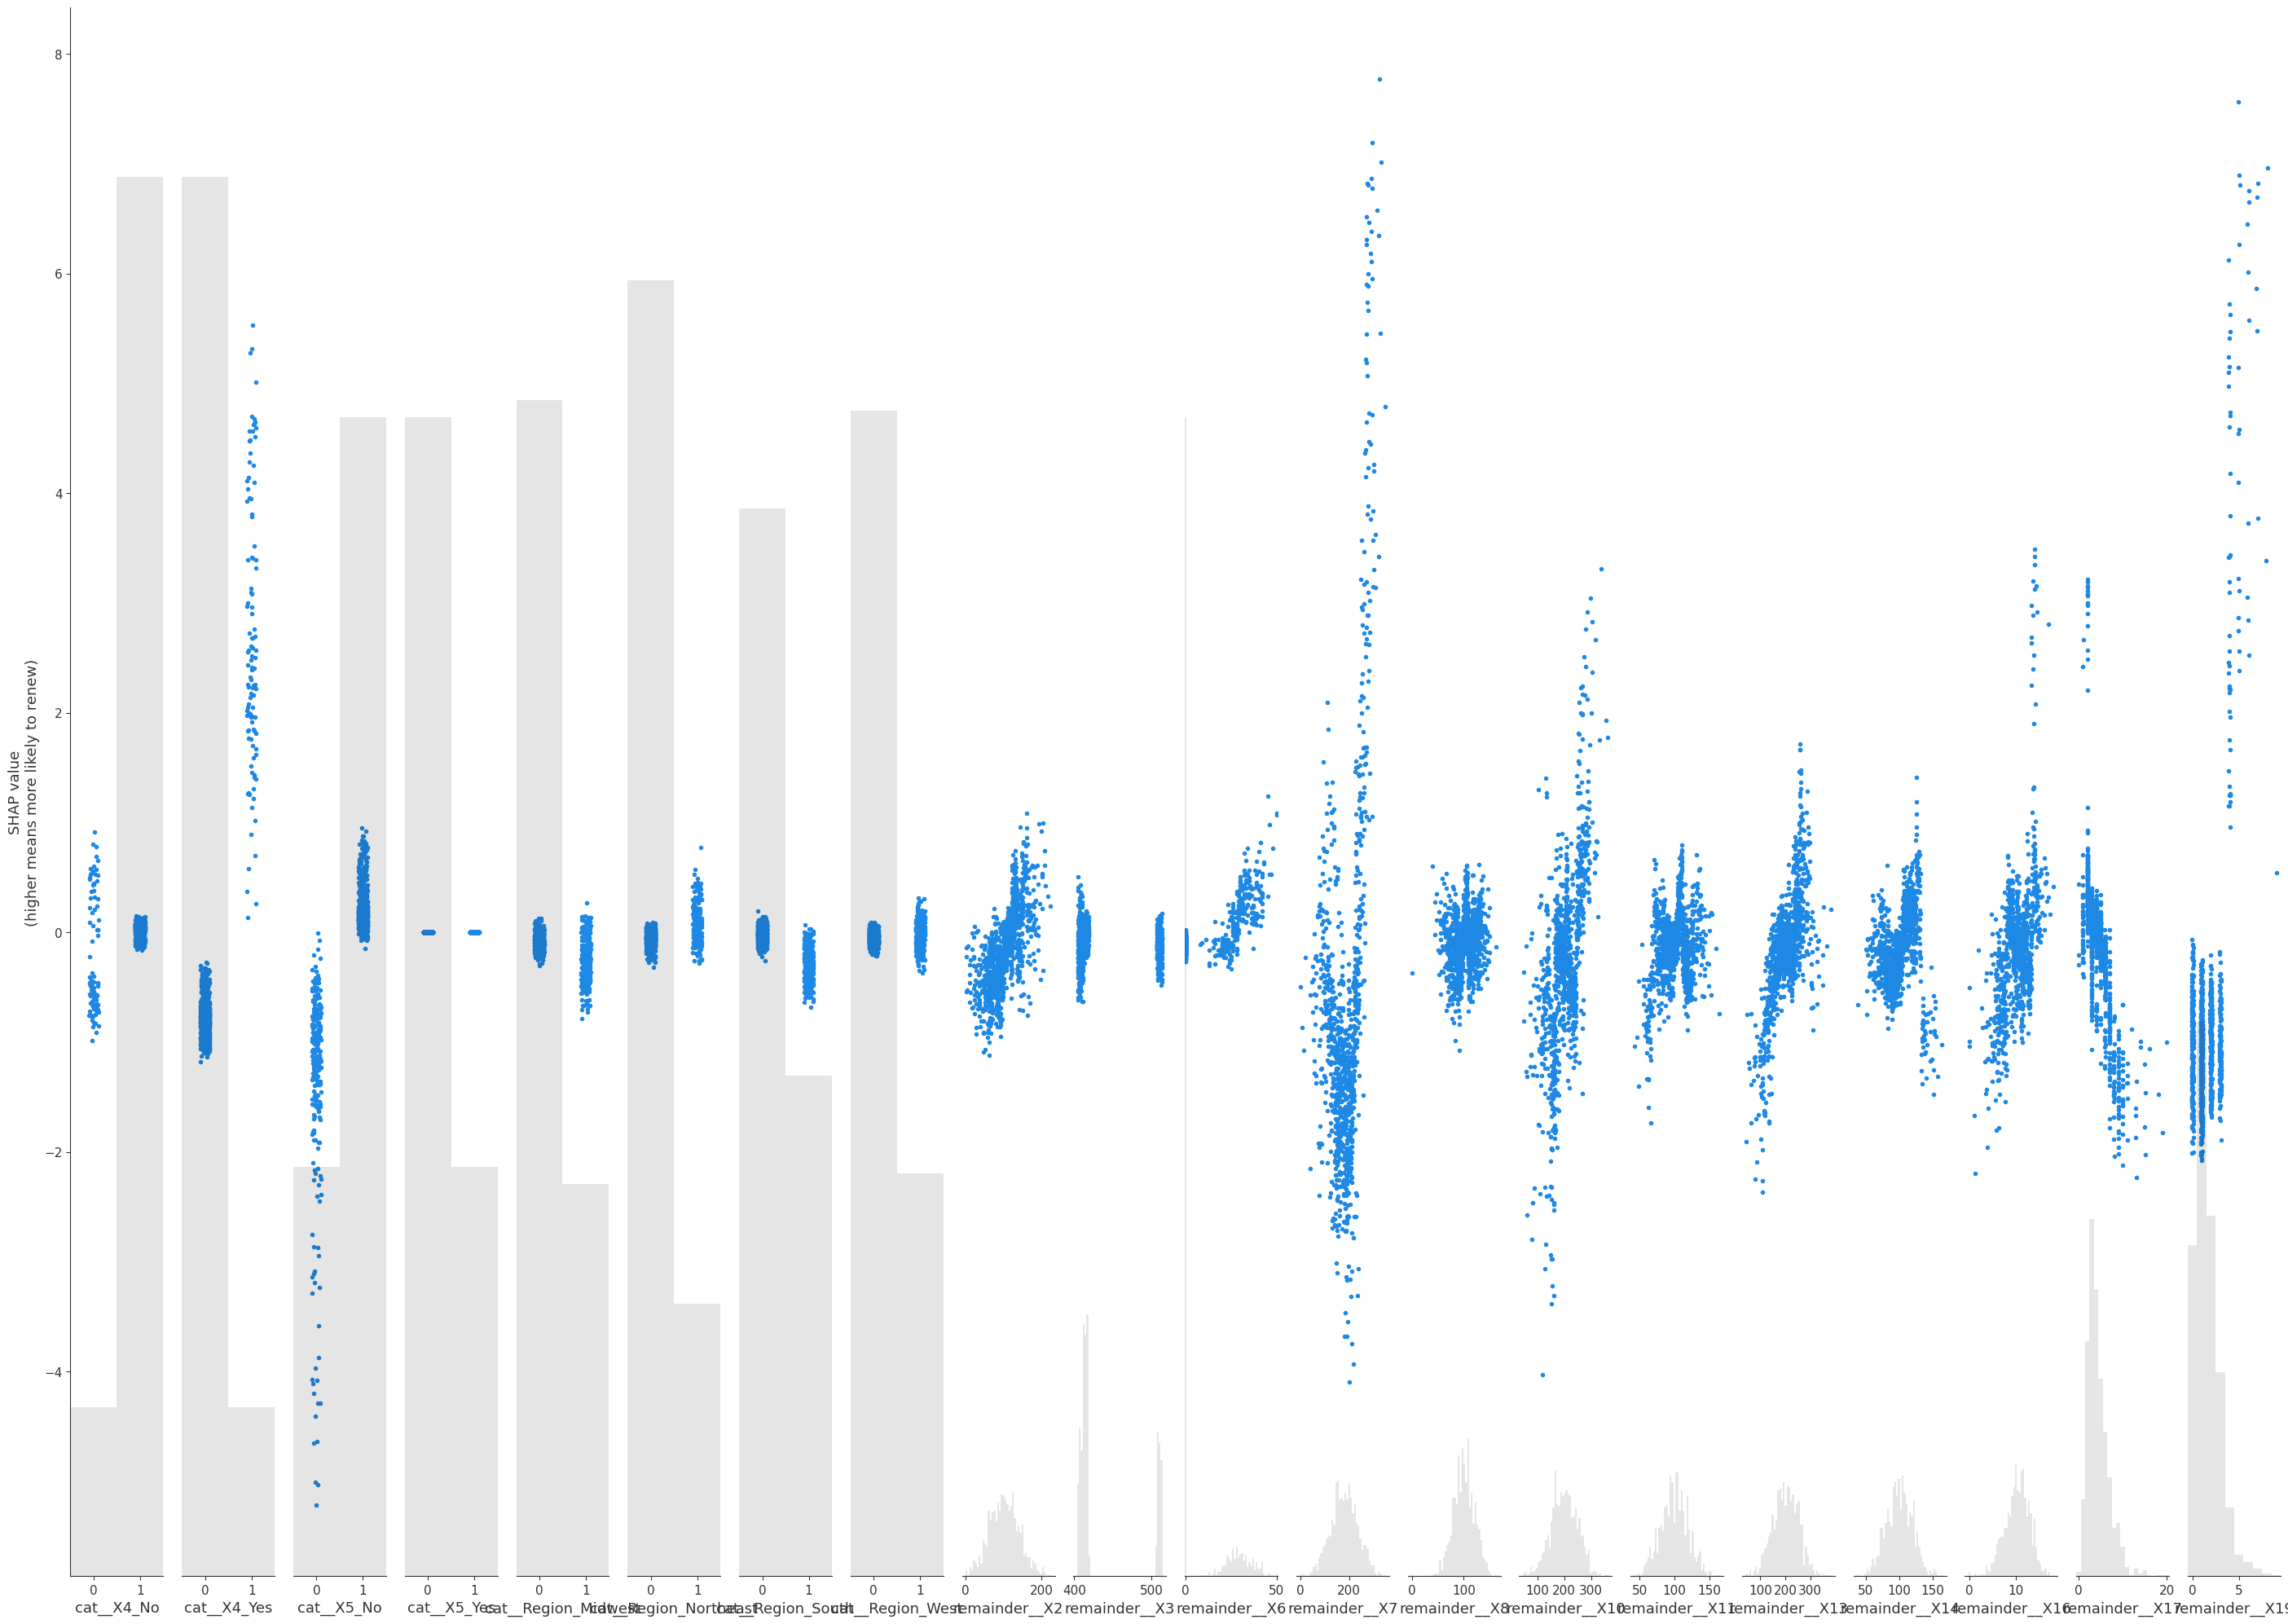

In [193]:
fig = plt.figure()

shap.plots.scatter(
    shap_values, ylabel="SHAP value\n(higher means more likely to renew)",show = False
)
plt.gcf().set_size_inches(35,25)
plt.show()

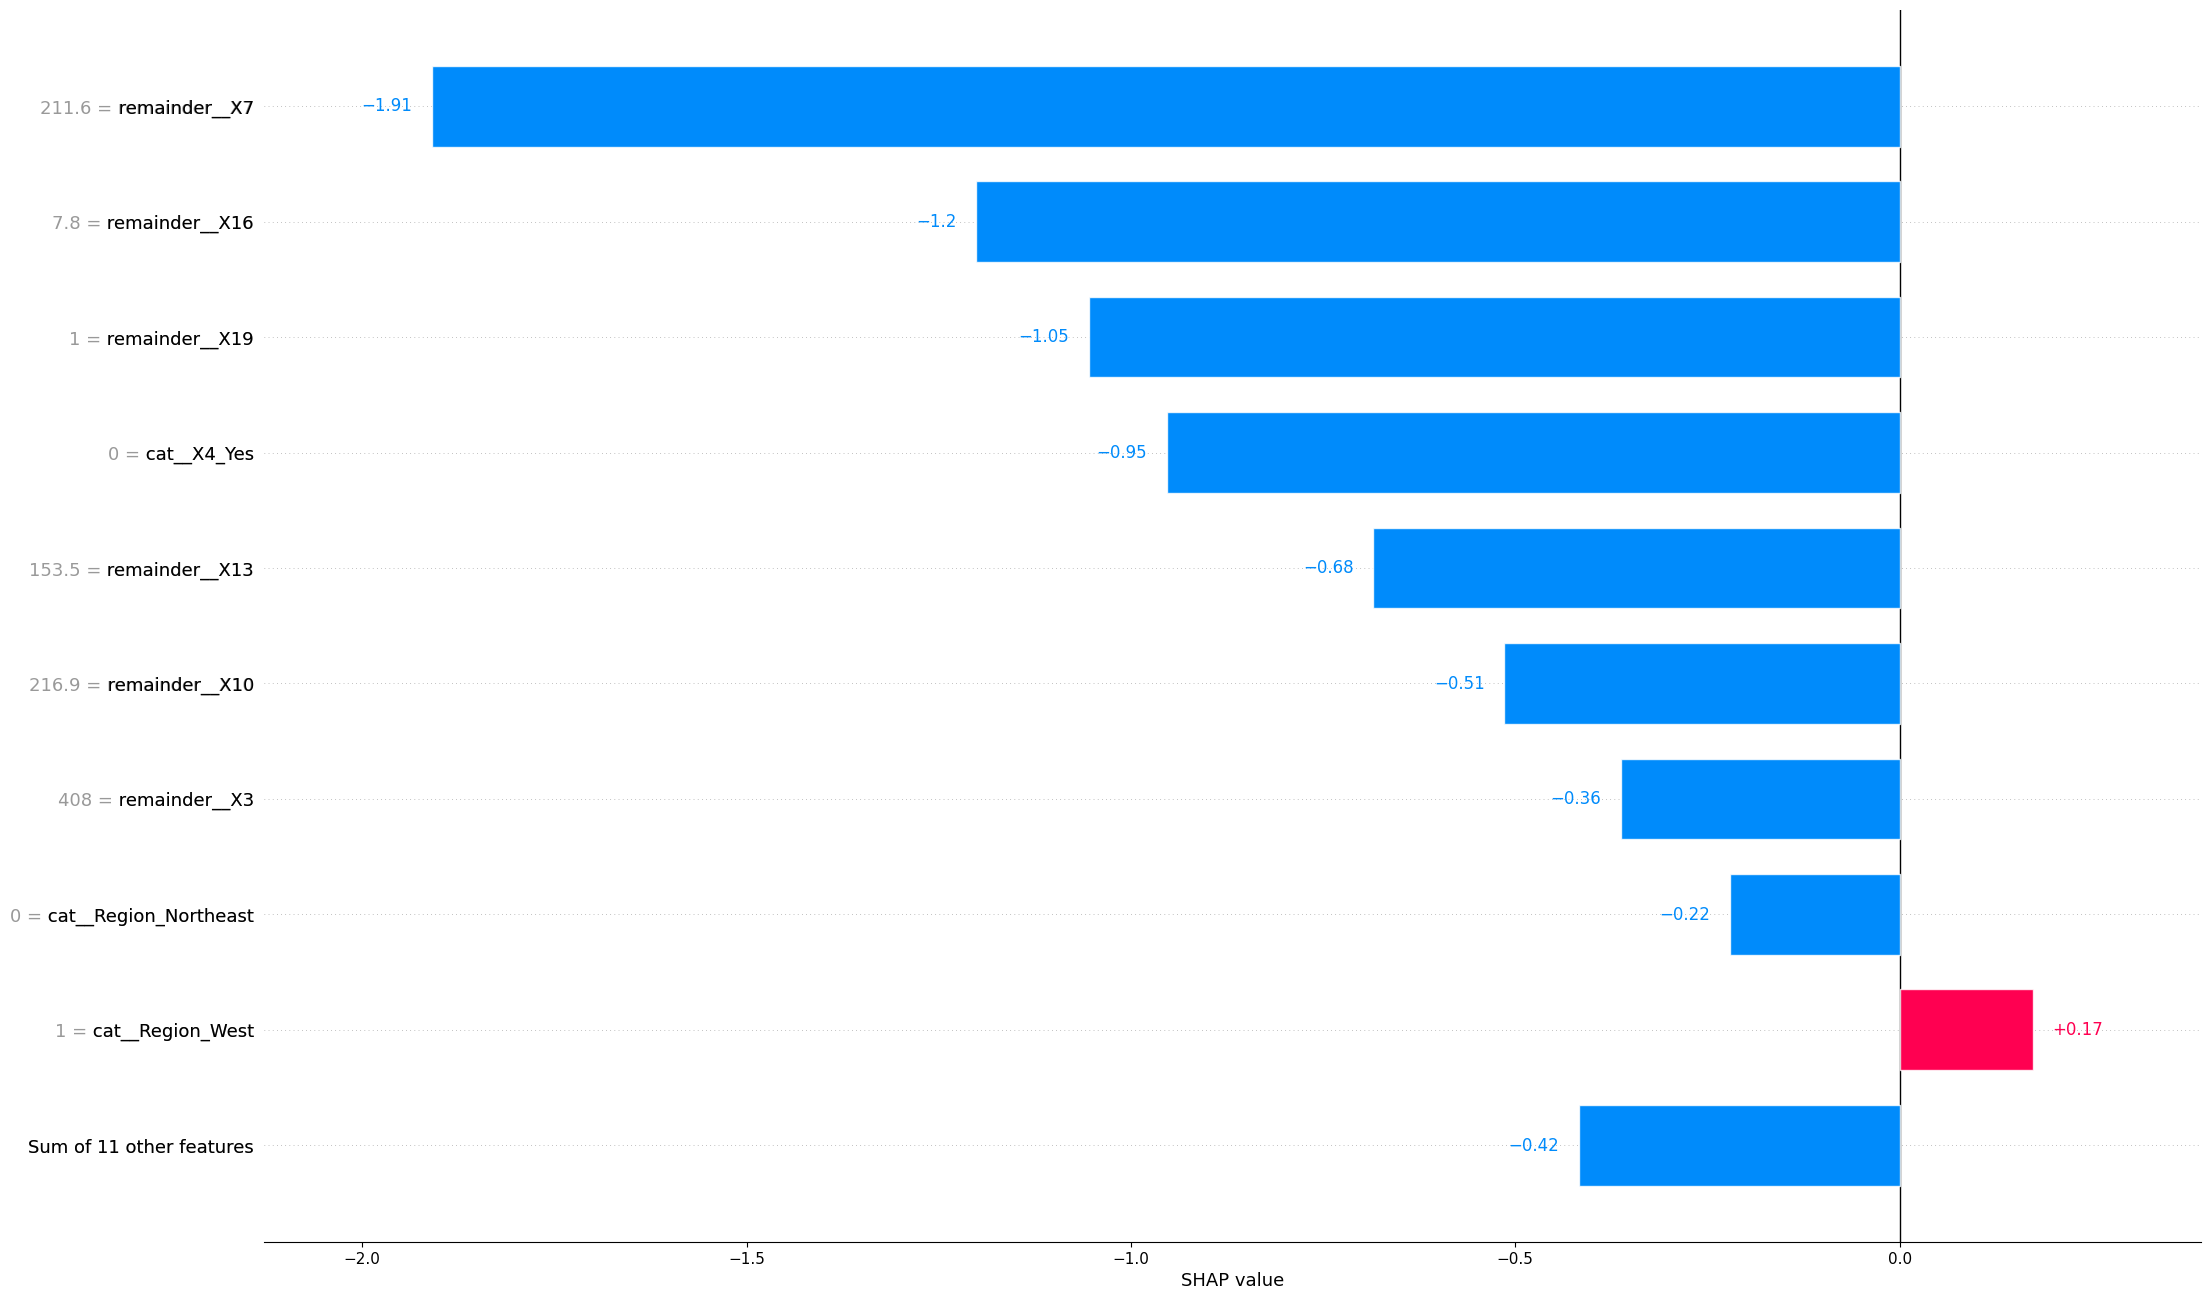

In [192]:
fig = plt.figure()
shap.plots.bar(shap_values[0], show = False)
plt.gcf().set_size_inches(25,16)
plt.show()

In [200]:
!pip3 install  econml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.1/389.1 kB 4.3 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 23.0 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 5.4 MB/s eta 0:00:00ta 0:00:01
  Created wheel for shap: filename=shap-0.43.0-cp312-cp312-macosx_14_0_x86_64.whl size=449669 sha256=3214bc3a4f09d11bd9a9e53c80da25d651104bb1660688d8acad21ed841669a9
  Stored in directory: /Users/SH014BI/Library/Caches/pip/wheels/e0/cb/3e/46cb0f77e2e4f5aa9fd5d399dedb3ba84f91f0c49e3db7d0e1
Successful